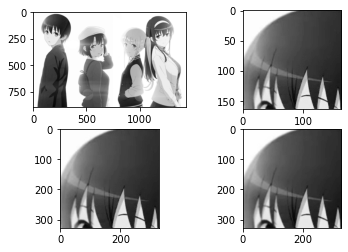

In [5]:
#內差法
from skimage import io
from skimage import transform
import matplotlib.pyplot as plt

c = io.imread("result2.jpg")
head = c[32:196,89:253]
#放大兩倍 近鄰內插
head4n_nnr = transform.rescale(head,2, order =0)
#放大兩倍 雙線性內插法
head4n_bl = transform.rescale(head,2, order =1)
fig = plt.figure()
plt.gray()  # show the filtered result in grayscale
ax1 = fig.add_subplot(221)  # left side
ax2 = fig.add_subplot(222)  # right side
ax3 = fig.add_subplot(223)  # left side
ax4 = fig.add_subplot(224)  # right side

ax1.imshow(c)
ax2.imshow(head)
ax3.imshow(head4n_nnr)
ax4.imshow(head4n_bl)
plt.show()
